In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
monthly_data=pd.read_csv("Monthly_data_cmo.csv")
msp_data=pd.read_csv("CMO_MSP_Mandi.csv")
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [76]:
msp_data.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [77]:
print(msp_data.shape)
print(monthly_data.shape)

(155, 5)
(62429, 11)


In [78]:
monthly_data['Commodity'].value_counts()

Gram                     3972
Wheat(Husked)            3946
Sorgum(Jawar)            3560
Soybean                  3545
Pigeon Pea (Tur)         3389
Maize                    2422
Green Gram               2294
Bajri                    2250
Onion                    1796
Black Gram               1557
Ground Nut Pods (Dry)    1045
Cotton                    990
Tomato                    975
Brinjal                   961
Ladies Finger             877
Paddy-Unhusked            870
Cabbage                   851
Green Chilli              802
Cucumber                  797
Flower                    784
Bitter Gourd              784
Potato                    687
Cluster Bean              664
Rice(Paddy-Hus)           640
Capsicum                  625
Bottle Gourd              570
Garlic                    557
Pomegranate               539
Sesamum                   526
Ginger (Fresh)            496
                         ... 
Punvad                      1
GINGER (DRY)                1
DOUBLE BEE

In [79]:
monthly_data.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [80]:
print(monthly_data['state_name'].value_counts())
monthly_data.describe()


Maharashtra    62429
Name: state_name, dtype: int64


,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


## Observations from monthly_data

###### We have only 1 state i.e. Maharashtra so we can drop it doesnt make any contribution
###### We have three columns, date, year and month, which are not all useful
###### Need to convert date column to date_time format
###### No NaN values 
###### max_price and min_price and modal_price both have '0' values, maybe outliers or wrong data
###### Only 3 years data here (2014 - 2016)

# MSP_data 

In [81]:
msp_data.head()


,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [82]:
msp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


In [83]:
msp_data.describe()


,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


## Observations from msp_data

###### Most importantly, 'msprice' has 10 missing values,evident by (145) where total length =155, big issue
###### We have data from 2012 to 2016, which is 2 years extra compared to monthly_data
###### 'msp_filter' has the same value everywhere, thus we can remove it


In [84]:
monthly_data.drop(labels=['state_name'],axis=1,inplace=True)
msp_data.drop(labels=['msp_filter'],axis=1,inplace=True)

### 'commodity' has a small c, so we are fixing that first

In [90]:
msp_data['commodity'] = [i.lower() for i in msp_data.commodity.values]
monthly_data['Commodity'] = [i.lower() for i in monthly_data.Commodity.values]
monthly_data=monthly_data.rename(index=str, columns={"Commodity": "commodity"})

In [91]:
#Converting to Date Time
monthly_data['date'] = pd.to_datetime(monthly_data['date'])
#Printing commodities with missing values
missing = list(msp_data.loc[msp_data.isnull().any(axis=1)]['commodity'])
print(missing)

['soyabean_black', 'soyabean_black', 'wheat(husked)', 'wheat(unhusked)', 'barli', 'gram_yellow', 'masur_yellow', 'mustard', 'safflower', 'toria_yellow']


In [92]:
for i in range(len(missing)):
    msp_data.loc[(msp_data.commodity == missing[i]) & (msp_data.msprice.isnull()),'msprice'] = msp_data.loc[(msp_data.commodity == missing[i]),'msprice'].mean()

In [93]:
msp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
commodity    155 non-null object
year         155 non-null int64
Type         155 non-null object
msprice      155 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB


In [94]:
print(len(monthly_data[monthly_data['modal_price']==0]))
print(len(monthly_data[monthly_data['min_price']==0]))
print(len(monthly_data[monthly_data['max_price']==0]))
print(len(monthly_data[monthly_data['min_price']>monthly_data['max_price']]))

204
175
35
296


### filling the missing values with mean of values from the past

In [95]:
missing = list(msp_data.loc[msp_data.isnull().any(axis=1)]['commodity'])
print(missing)
for i in range(len(missing)):
    msp_data.loc[(msp_data.commodity == missing[i]) & (msp_data.msprice.isnull()),'msprice'] = msp_data.loc[(msp_data.commodity == missing[i]),'msprice'].mean()


[]


In [96]:
msp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
commodity    155 non-null object
year         155 non-null int64
Type         155 non-null object
msprice      155 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB


### Observing the skewness and distribution of frequencies of APMC's and Commodities in dataset

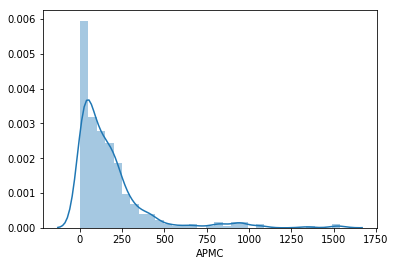

In [97]:
sns.distplot(monthly_data.APMC.value_counts())
plt.savefig('APMC_dist.png',dpi = 200)

In [98]:
monthly_data.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,commodity
0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,sunflower
1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,sunflower
2,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,sunflower
3,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,sunflower
4,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,sunflower


In [100]:
sns.distplot(monthly_data.commodity.value_counts())
plt.savefig('Commodity_dist.png',dpi = 200)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [101]:
monthly_data.to_csv('Cleansed_mandi_data.csv')
msp_data.to_csv('Cleansed_msp_data.csv')

##### We find that the data for the APMC's is highly skewed
##### there is a lot of data for larger APMC's like Mumbai,Pune, Nagpur
##### Large skewness exists in the commodities distribution,
##### While, analysing Seasonality, we must make sure we take commodities and APMC's with sufficient values for correct detection